# STATISTIQUES SUR LES PERMUTATIONS ALEATOIRES

*Théophile&nbsp;BARANGER, David&nbsp;DE&nbsp;CARVALHO, Yassine&nbsp;LAAMOUMRI, Exaucé&nbsp;LUWEH&nbsp;ADJIM&nbsp;NGARTI*

- - -

Dans ce rapport, nous allons nous intéresser aux statistiques concernant les permutations aléatoires. On s'intéressera spécifiquement aux nombres de descentes, de pics, puis à la longueur de la plus grande sous-suite alternée de permutations aléatoires.

Le sujet de cette étude (composé par [Bernard Bercu](http://www.math.u-bordeaux.fr/~bbercu/)) est disponible ici&nbsp;:&nbsp;[Lien vers le sujet](Permutations-Aléatoires-Sujet.pdf)


## 1 Nombre de descentes

Dans cette première partie, nous allons nous intéresser à certaines propriétés propres aux descentes dans les permutations aléatoires.

> Soit $S_{n}$ l'ensemble des permutations des $n$ premiers entiers, avec $n\geq1$. Soit $\pi$ une permutation de $S_{n}$. On dit que $\pi$ a une descente à la position $k$ si $\pi(k+1) \lt \pi(k)$. On note $D_{n}$ la variable aléatoire comptant le nombre de descentes d'une permutation choisie aléatoirement dans $S_{n}$. Il est clair que $D_{1}=0$ et pour tout $n\geq2$,
>
>&nbsp;
>$$D_{n}(\Omega)=\{0,1,\ldots,n-1\}$$
>&nbsp;
>
>En particulier, on a $\mathbb{P}(D_{2}=0)=\mathbb{P}(D_{2}=1)=1/2$. On s'intéresse au comportement asymptotique de la suite $(D_{n})$. On peut montrer (voir sujet), que pour tout $n\geq1$,
>
>&nbsp;
>$$
    \left \{ \begin{array}{rcl}
    \mathbb{P}(D_{n+1}  = D_{n}+1|D_n)  & = & {\displaystyle  \frac{n-D_n}{n+1} }\\
    \mathbb{P}(D_{n+1}  =  D_{n}|D_n) & = & {\displaystyle \frac{D_n+1}{n+1}}
   \end{array} \nonumber \right.$$
>&nbsp;
>
>On en déduit la décomposition
>
>&nbsp;
>$$D_{n+1}=D_{n} + \varepsilon_{n+1}$$
>
>avec
>
>$$
   \varepsilon_{n+1}= \left \{ \begin{array}{ccc}
    1 & \text{ avec probabilité } & p_n \\
    0  & \text{ avec probabilité } & 1-p_n 
   \end{array} \nonumber \right.$$
>
>où
>
>$$ {\displaystyle p_{n}=\frac{n-D_{n}}{n+1} }$$


### 1.1 Convergence presque sûre

On commence par effectuer une simulation avec un $n$ suffisamment grand. <br>Par exemple, prenons $n=10000$.

On utilisera la bibliothèque **matplotlib** pour effectuer la visualisation.


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as stats
import random

In [133]:
plt.rcParams["figure.figsize"] = (15,10)

In [134]:
def dn_n_sequence(n):
    Dn=0
    tab=[0]
    for i in range(1,n+1):
        pn = (i - Dn)/(i+1)
        if (random.uniform(0,1) < pn):
            e = 1
        else:
            e = 0
        Dn = Dn + e
        tab.append(Dn/i)
    return tab

In [135]:
def convergence_ps_dn_n(n):
    fig1 = plt.figure()
    plt.plot(dn_n_sequence(n))
    plt.plot([0,n],[0.5,0.5],linestyle="--",linewidth=2)
    fig1.suptitle("\n" + r"Évolution du rapport $\frac{D_{n}}{n}$ pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

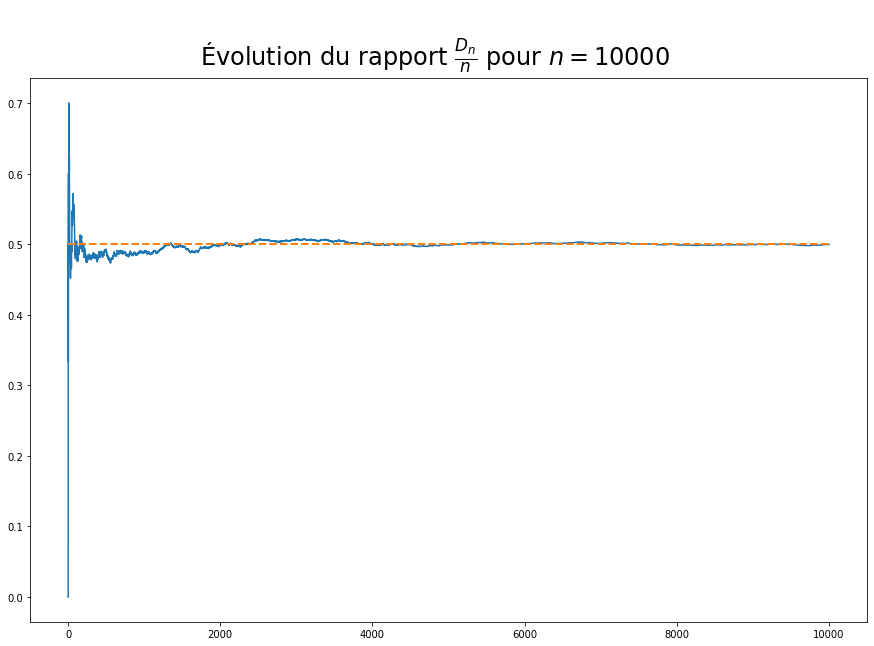

In [136]:
convergence_ps_dn_n(10000)

On observe une convergence vers la valeur attendue, c'est-à-dire $\frac{1}{2}$.


### 1.2 Normalité asymptotique


In [137]:
# Fonction retournant un tableau à n*m entrées,
# où n correspond au nombre de termes de la suite Dn/n, et
# où m correspond au nombre de répétitions.
def repetitions_array(n, m):
    tab = []
    for i in range(m):
        Dn=0
        tab.append(0)
        for j in range(1,n+1):
            pn = (j-Dn)/(j+1)
            if (random.uniform(0,1) < pn):
                e = 1
            else:
                e = 0
            Dn = Dn + e
            tab.append(sqrt(j)*(Dn/j-1/2))
    return tab

In [138]:
matrix = repetitions_array(10000, 1000)

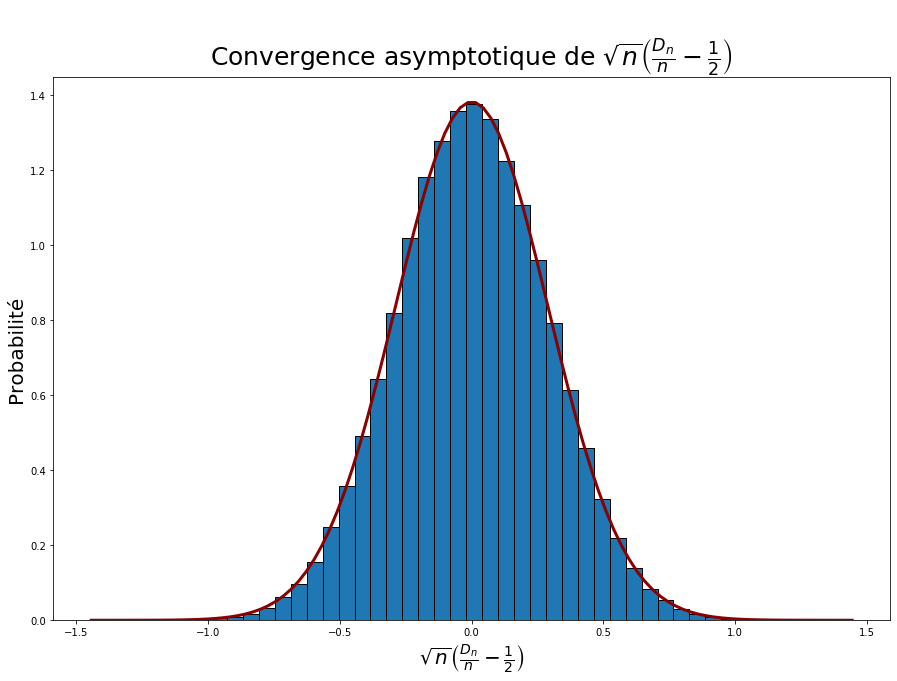

In [139]:
# On construit l'histogramme
_, _, _ = plt.hist(matrix, edgecolor='black',
                   bins=40, density=True)

plt.xlabel(r"$\sqrt{n} \left( \frac{D_{n}}{n} - \frac{1}{2} \right) $",fontsize=20)
plt.ylabel('Probabilité',fontsize=20)
plt.title("\nConvergence asymptotique de " + r"$\sqrt{n} \left( \frac{D_{n}}{n} - \frac{1}{2} \right) $", fontsize=25)

mu = 0
variance = 1/12
sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="darkred",linewidth=3)
plt.show()

### 1.3 Calculs de l'espérance et de la variance de $D_{n}$

Pour calculer l'espérance de $D_{n}$, nous allons utiliser la **formule d'espérance totale**

<br>

$$\mathbb{E}[\mathbb{E}[X \mid Y]] = \mathbb{E}[X]$$

<br>

On a déjà établi plus tôt la relation

<br>

$$D_{n+1}=D_{n} + \varepsilon_{n+1}$$

<br>

On calcule donc l'espérance

<br>

$$
    \begin{array}{ccl}
    \mathbb{E}[D_{n+1} \mid D_{n}] & = & \mathbb{E}[D_{n} + \varepsilon_{n+1} \mid D_{n}] \\
   & = & {\displaystyle \mathbb{E}[D_{n} \mid D_{n}] + \mathbb{E}[\varepsilon_{n+1} \mid D_{n}] }\\
   & = & {\displaystyle D_{n} + p_{n} }\\
   & = & {\displaystyle D_{n} + \frac{n-D_{n}}{n+1} }\\
   & = & {\displaystyle \frac{n(D_{n} + 1)}{n+1} }
   \end{array} \nonumber 
$$

<br>

Et donc, avec la **formule d'espérance totale**

<br>

$$\mathbb{E}[\mathbb{E}[D_{n+1} \mid D_{n}]] = \mathbb{E}[D_{n+1}]$$

$$\mathbb{E}[D_{n+1}] = \frac{n}{n+1}\mathbb{E}[D_{n}] + \frac{n}{n+1}$$

<br>

Soit $d_{n} = \mathbb{E}[D_{n}]$, on obtient la relation de récurrence

<br>

$${\displaystyle d_{n+1} = d_{n}\cdot \frac{n}{n+1} + \frac{n}{n+1} }$$

<br>

Autrement dit, on obtient une formule de récurrence pour l'espérance de $D_{n}$ de la forme

<br>

$${\displaystyle \forall n \geq 1, \; d_{n+1}=a_{n}\cdot d_{n} + b_{n} }$$

<br>


- - -

## 2 Nombre de suites alternées

Dans cette seconde partie, nous allons nous intéresser au nombre de suites alternées dans une permutations aléatoire, i.e. au nombre d'endroits où la permutation change de direction, soit d'une descente vers une montée, soit l'inverse.

(...)

On commence par là encore par effectuer une simulation avec un $n$ suffisamment grand pour visualiser la convergence, que l'on ne démontrera pas ici.

In [140]:
def gn_n_sequence(n):
    Gn=0
    tab=[0]
    for i in range(1,n+1):
        pn = (i - 1 - Gn)/(i+1)
        qn = 2/(i + 1)
        p = random.uniform(0,1)
        if (p < pn):
            e = 2
        elif (p < pn+qn):
            e = 1
        else:
            e = 0
        Gn = Gn + e
        tab.append(Gn/i)
    return tab

In [141]:
def convergence_ps_gn_n(n):
    fig2 = plt.figure()
    plt.plot(gn_n_sequence(n))
    plt.plot([0,n],[2/3,2/3],linestyle="--",linewidth=2)
    fig2.suptitle("\n" + r"Évolution du rapport $\frac{G_{n}}{n}$ pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

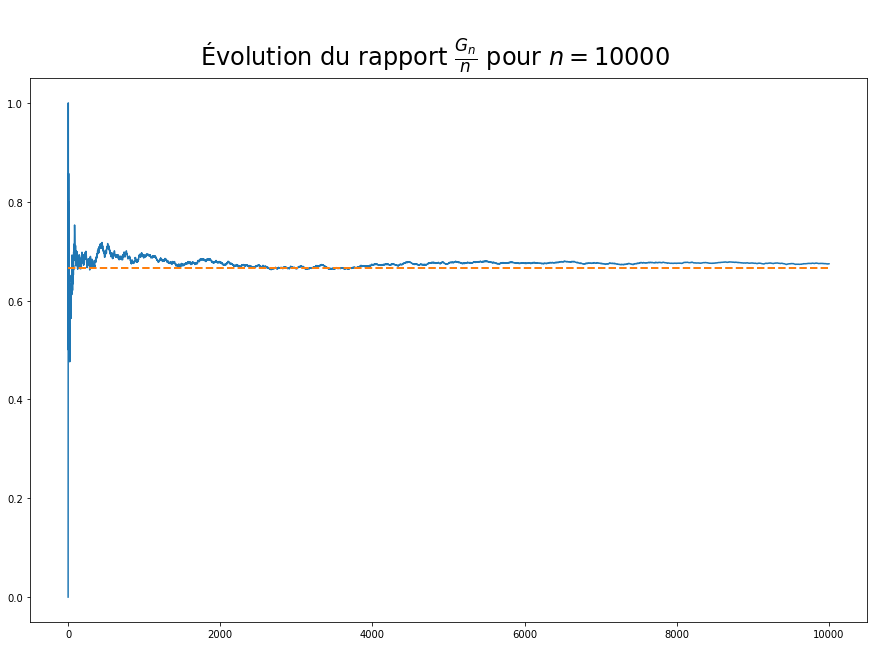

In [142]:
convergence_ps_gn_n(10000)

On observe une convergence vers la valeur attendue, c'est-à-dire $\frac{2}{3}$.

### 1.2 Normalité asymptotique

In [143]:
# Fonction retournant un tableau à n*m entrées,
# où n correspond au nombre de termes de la suite Gn/n, et
# où m correspond au nombre de répétitions.
def repetitions_array_gn(n, m):
    tab = []
    for i in range(m):
        Gn=0
        tab.append(Gn)
        tab.append(Gn)
        for j in range(2, n):
            pn = (j - 1 - Gn)/(j+1)
            qn = 2/(j + 1)
            p = random.uniform(0,1)
            if (p < pn):
                e = 2
            elif (p < pn+qn):
                e = 1
            else:
                e = 0
            Gn = Gn + e
            tab.append(sqrt(j)*((Gn/j)-(2/3)))
    return tab

In [144]:
matrix = repetitions_array_gn(10000, 1000)

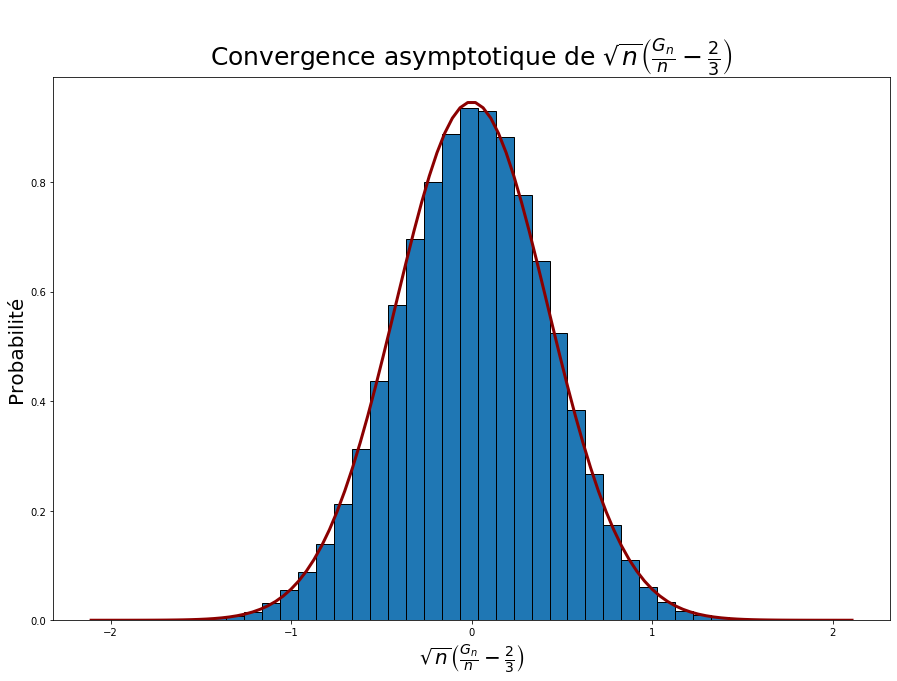

In [145]:
# On construit l'histogramme
_, _, _ = plt.hist(matrix, edgecolor='black',
                   bins=40, density=True)

plt.xlabel(r"$\sqrt{n} \left( \frac{G_{n}}{n} - \frac{2}{3} \right)$",fontsize=20)
plt.ylabel('Probabilité',fontsize=20)
plt.title("\nConvergence asymptotique de " + r"$\sqrt{n} \left( \frac{G_{n}}{n} - \frac{2}{3} \right)$", fontsize=25)
mu = 0

variance = 8/45 # voir calcul dans la section suivante

sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="darkred",linewidth=3)
plt.show()

### 1.3 Calcul de la variance de $G_n$

On a obtenu la formule suivante pour l'espérance de $G_n$

<br>

$${\displaystyle \mathbb{E}[G_{n+1}] = \frac{n-1}{n+1} \cdot \mathbb{E}[G_n] + \frac{2n}{n+1}}$$

<br>

D'où l'on déduit

<br>

$${\displaystyle \mathbb{E}[G_{n}] = \frac{2n-1}{3}}$$

<br>

On calcule $\mathbb{E}[G_{n}^2]$ par la même méthode que précédemment

<br>

$$
    \begin{array}{ccl}
    {\displaystyle \mathbb{E}[G_{n+1}^2 \mid G_n]} & = & {\displaystyle \mathbb{E}[(G_n + \varepsilon_{n+1})^2]} \\
    & = & {\displaystyle (G_n^2 + 4G_n + 4)p_n + (G_n^2 + 2G_n + 1)q_n + G_n^2(1 - p_n - q_n)} \\
    & = & {\displaystyle \frac{1}{n+1} \bigl[ (G_n^2 + 4G_n + 4)(n - 1 - G_n) + 2(G_n^2 + 2G_n + 1) + G_n^3 \bigr ]} \\
    & = & {\displaystyle \frac{1}{n+1} \bigl[ (n-3)G_n^2 + (4n-4)G_n + 4n-2 \bigr ]}
    \end{array} \nonumber
$$

<br>

En appliquant la **formule d'espérance totale**, on obtient

<br>

$$
    \begin{array}{ccl}
    {\displaystyle \mathbb{E}[G_{n+1}^2]} & = & {\displaystyle \frac{n-3}{n+1}\mathbb{E}[G_n^2] + \frac{4n-4}{n+1} \cdot \frac{2n-1}{3} + \frac{4n-2}{n+1}} \\
    & = & {\displaystyle \frac{n-3}{n+1}\mathbb{E}[G_n^2] + \frac{2}{3} \cdot \frac{4n^2-1}{n+1} }
    \end{array} \nonumber
$$

<br>

On arrive donc ensuite à obtenir, pour tout $n\geq4$

<br>

$$
    \begin{array}{ccl}
    {\displaystyle \mathbb{E}[G_{n}^2]} & = & {\displaystyle \frac{24(n-4)!}{n!} \left [ \frac{35}{6} + \sum_{k=4}^{n-1}\left (\frac{2}{3} \cdot \frac{4k^2-1}{k+1} \cdot \frac{(k+1)k(k-1)(k-2)}{24} \right ) \right ] } \\
    & = & {\displaystyle \frac{2}{3} \cdot \frac{(n-4)!}{n!} \left [\sum_{k=3}^{n-1}(2k-1)(2k+1)k(k-1)(k-2) \right ]} \\
    & = & {\displaystyle \frac{1}{90}(8n(5n-3)-19) }
    \end{array} \nonumber
$$

<br>

On peut maintenant calculer la variance de $G_n$ en appliquant la définition

<br>

$$
    \begin{array}{ccl}
    {\displaystyle \mathbb{V}(G_n) } & = & {\displaystyle \mathbb{E}[G_n^2] - \mathbb{E}[G_n]^2 } \\
    & = & {\displaystyle \frac{1}{90}(8n(5n-3)-19) - \left ( \frac{2n-1}{3} \right )^2 } \\
    & = & {\displaystyle \frac{8n}{45} - \frac{29}{90} }
    \end{array} \nonumber
$$

<br>

>*Ce résultat semble bien correspondre à la simulation effectuée dans la section précédente, où on avait pris une variance de $\frac{8}{45}$ pour la loi normale centrée en zéro.*

## 3 Longueur de la plus grande sous-suite alternée.
On souhaite finalement étudier la longueur de la plus grande sous-suite alternée d’une
permutation aléatoire. Soit $L_n$ la variable aléatoire correspondant à la longueur
de la plus grande sous-suite alternée d’une permutation $\pi$ choisie aléatoirement dans $S_n$.


### 3.1 Convergence presque sûre


In [146]:
def ln_n_sequence(n):
    Ln=0
    tab=[0]
    for i in range(2,n+1):
        pn = (i -Ln)/(i+1)
        qn = 1/(i + 1)
        p = random.uniform(0,1)
        if (p < pn):
            e = 2
        elif (p < pn+qn):
            e = 1
        else:
            e = 0
        Ln = Ln + e
        tab.append(Ln/i)
    return tab

In [147]:
def convergence_ps_ln_n(n):
    fig2 = plt.figure()
    plt.plot(ln_n_sequence(n))
    plt.plot([0,n],[2/3,2/3],linestyle="--",linewidth=2)
    fig2.suptitle("\n" + r"Évolution du rapport $\frac{L_{n}}{n}$ pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

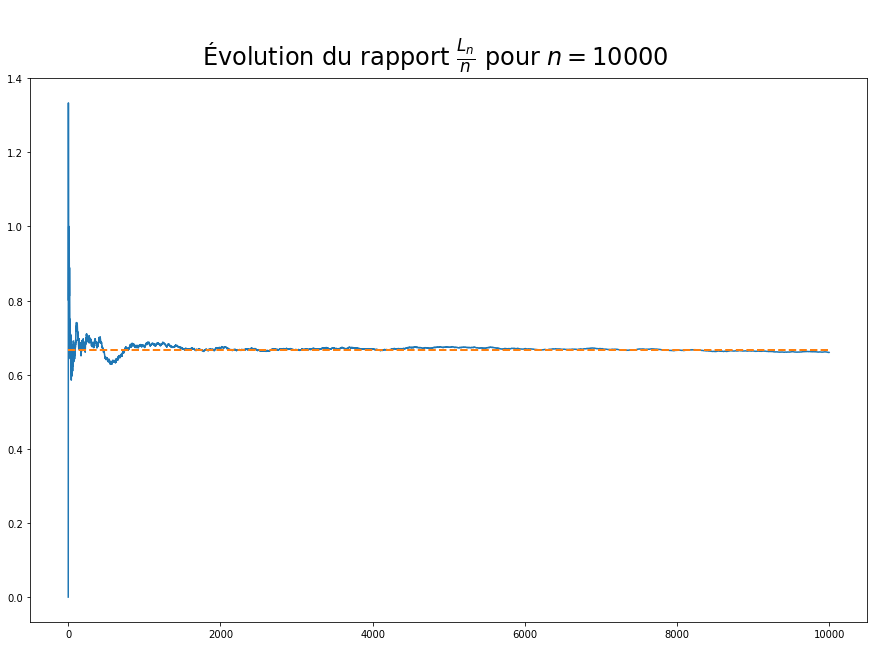

In [148]:
convergence_ps_ln_n(10000)

### 3.2 Normalité asymptotique

In [149]:
# Fonction retournant un tableau à n*m entrées,
# où n correspond au nombre de termes de la suite Ln/n, et
# où m correspond au nombre de répétitions
def repetitions_array_ln(n, m):
    tab = []
    for i in range(m):
        Ln=0
        tab.append(Ln)
        tab.append(Ln)
        for j in range(2, n):
            pn = (j - Ln)/(j+1)
            qn = 1/(j + 1)
            p = random.uniform(0,1)
                               
            if (p < pn):
                e = 2
            elif (p < pn+qn):
                e = 1
            else:
                e = 0
            Ln = Ln + e
            tab.append(sqrt(j)*((Ln/j)-(2/3)))
    return tab

In [150]:
matrix = repetitions_array_ln(10000, 1000)


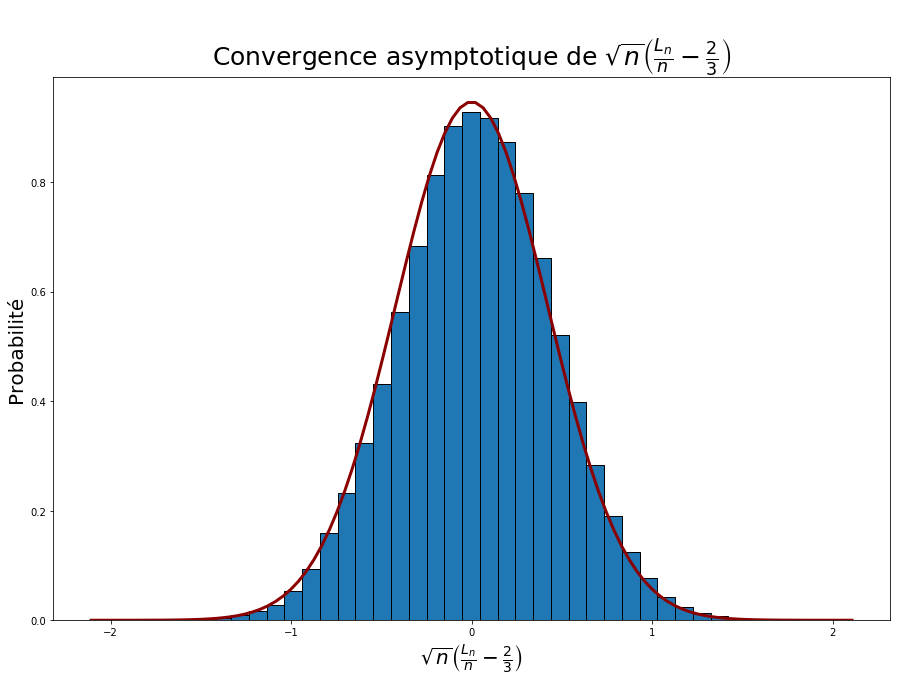

In [151]:
# On construit l'histogramme
_, _, _ = plt.hist(matrix, edgecolor='black',
                   bins=40, density=True)

plt.xlabel(r"$\sqrt{n} \left( \frac{L_{n}}{n} - \frac{2}{3} \right)$",fontsize=20)
plt.ylabel('Probabilité',fontsize=20)
plt.title("\nConvergence asymptotique de " + r"$\sqrt{n} \left( \frac{L_{n}}{n} - \frac{2}{3} \right)$", fontsize=25)
mu = 0

variance = 8/45

sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="darkred",linewidth=3)
plt.show()

## 4 Autres statistiques

### 4.1 Oscillations

#### 4.1.1 Convergence presque sûre

On commence par analyser le comportement de la suite $O_n$ définie par récurrence. On définit l'oscillation $O_n$ d'une permutation comme la somme sur $[1:n]$ des distances mutuelles des éléments de la permutation, avec conditions de bords périodiques.

In [152]:
# Cette fonction prend en paramètre une permutation et retourne son oscillation
def oscillation(P):
    n = len(P)
    o = 0
    for i in range(n):
        o += np.abs(P[i] - P[(i+1)%n])
    return  o

In [153]:
# Cette fonction prend en paramètre une permutation de n élement(s) 
# et passe à la permutation suivante(n+1 élémént(s)) de  manière aléatoire
def next_Permutation(P):
    n = len(P)
    m = random.randint(0, n)
    P.insert(m,n+1)
    return P, m

En réalité, c'est plutôt la définition suivante que l'on va utiliser, étant donné qu'elle permet de recalculer l'oscillation d'une permutation après insertion de la valeur $n+1$ en temps constant, plutôt que de retraverser toute la permutation.

In [154]:
# Cette fonction met à jour l'oscillation de P en fonction de l'indice
# où a été ajouté le dernier élément
def update_oscillation(P, o, m):
    n = len(P)
    if (n == 1):
        return 0
    else:
        return o - np.abs(P[(m-1)%n]-P[(m+1)%n]) + np.abs(P[m]-P[(m-1)%n]) + np.abs(P[m]-P[(m+1)%n])

In [155]:
def on_sequence(n):
    tab=[]
    P = []
    On = 0
    for i in range(n):
        P, m = next_Permutation(P)
        On = update_oscillation(P, On, m)
        tab.append(On)
    return tab

In [156]:
def plot_on(n):
    fig2 = plt.figure()
    plt.plot(on_sequence(n))
    fig2.suptitle("\n" + r"Évolution de $O_{n}}$  pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

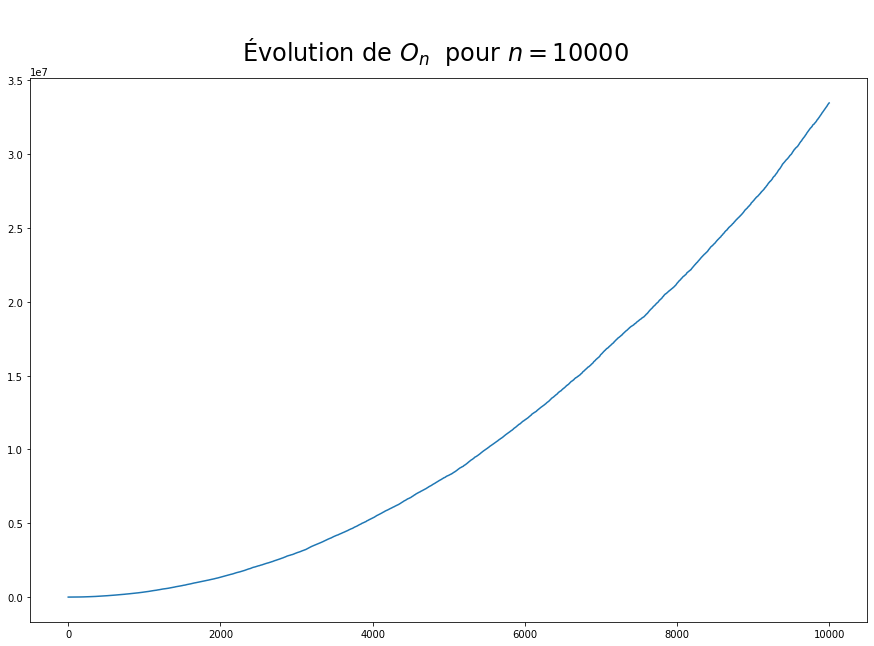

In [157]:
plot_on(10000)

On voit que la suite $O_n$ a une croissance globalement quadratique. Cela nous guide donc dans la recherche d'une convergence asymptotique, et en l'occurrence on s'intéresse à la suite des $\frac{O_n}{n^2}$.

In [158]:
def on_n_sequence(n):
    tab=[0]
    P = []
    On = 0
    for i in range(1,n+1):
        P, m = next_Permutation(P)
        On = update_oscillation(P, On, m)
        tab.append(On/i**2)
    return tab

In [159]:
def convergence_ps_on_n2(n):
    fig2 = plt.figure()
    plt.plot(on_n_sequence(n))
    plt.plot([0,n],[1/3,1/3],linestyle="--",linewidth=2)
    fig2.suptitle("\n" + r"Évolution du rapport $\frac{O_{n}}{n^2}$ pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

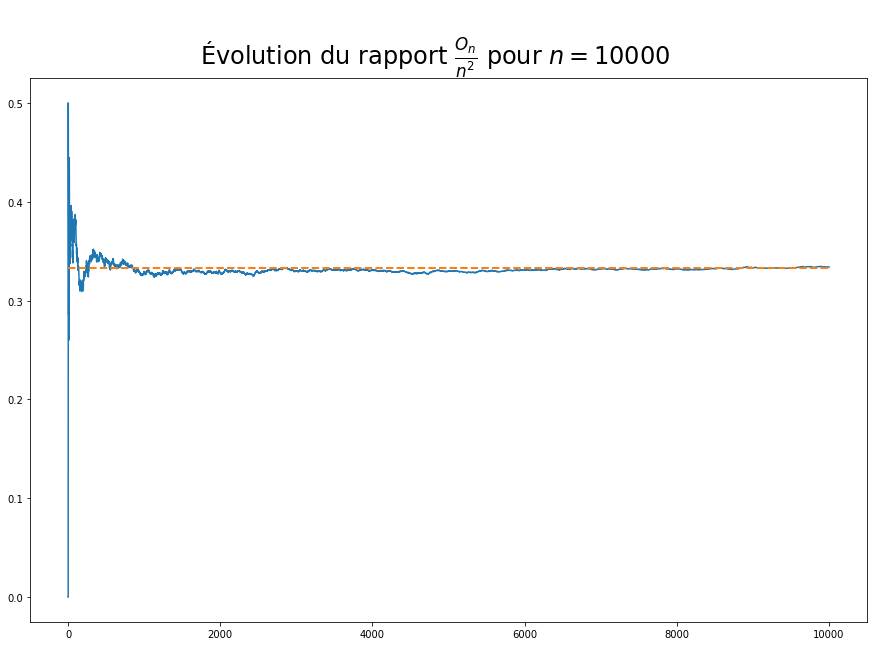

In [160]:
convergence_ps_on_n2(10000)

#### 4.1.2 Normalité asymptotique

In [161]:
# Fonction retournant un tableau à n*m entrées,
# où n correspond au nombre de termes de la suite On/n², et
# où m correspond au nombre de répétitions
def repetitions_array_on(n, m):
    tab = []
    for i in range(m):
        P = []
        On=0
        for j in range(1, n+1):
            P, k = next_Permutation(P)
            On = update_oscillation(P, On, k)
            tab.append(sqrt(j)*((On/j**2)-(1/3)))
    return tab

In [162]:
matrix = repetitions_array_on(5000, 500)

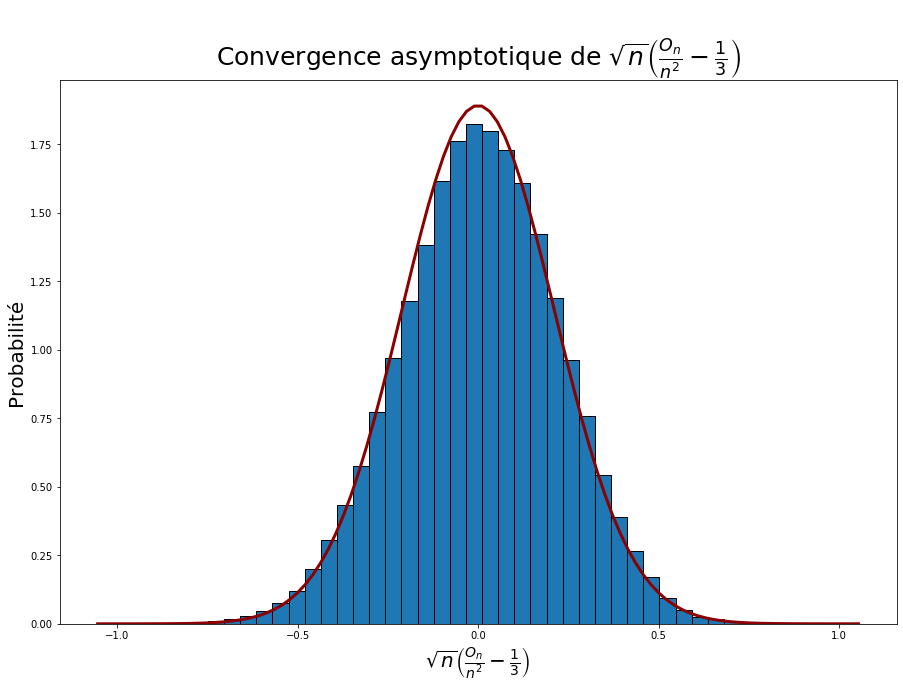

In [163]:
# On construit l'histogramme
_, _, _ = plt.hist(matrix, edgecolor='black',
                   bins=40, density=True)

plt.xlabel(r"$\sqrt{n} \left( \frac{O_{n}}{n^2} - \frac{1}{3} \right)$",fontsize=20)
plt.ylabel('Probabilité',fontsize=20)
plt.title("\nConvergence asymptotique de " + r"$\sqrt{n} \left( \frac{O_{n}}{n^2} - \frac{1}{3} \right)$", fontsize=25)
mu = 0

variance = 2/45 # voir références

sigma = sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="darkred",linewidth=3)
plt.show()

#### 4.2.1 Distribution des $\|O_{n+1}-O_n\|$

Dans l'espoir de représenter la suite des $O_n$ par une martingale, on cherche à analyser la distribution des distances terme à terme de la suite des $O_n$. On note $\varepsilon_{n+1}=\|O_{n+1}-O_n\|$.

In [164]:
def en_n_sequence(n):
    tab=[0]
    P = []
    On = 0
    for i in range(1,n+1):
        P, m = next_Permutation(P)
        On_1 = update_oscillation(P, On, m)
        tab.append(np.abs(On_1 - On)/(i+1))
        On= On_1
    return tab

In [165]:
def plot_en_n(n):
    fig2 = plt.figure()
    plt.plot(en_n_sequence(n))
    fig2.suptitle("\n" + r"Évolution de $\frac{\varepsilon_{n}}{n}$  pour $n=$" + "{}".format(n), fontsize=24)
    plt.show()

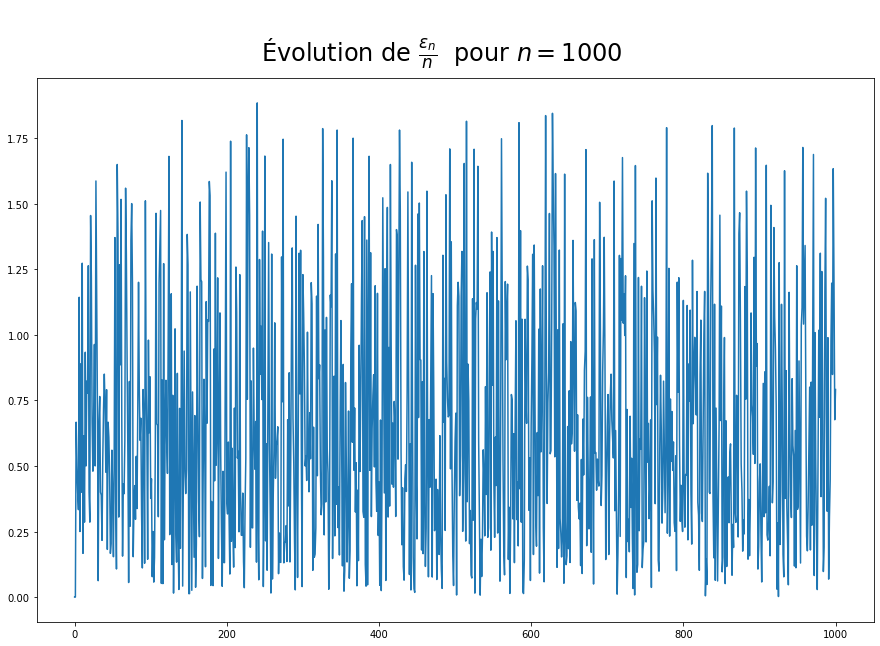

In [166]:
plot_en_n(1000)

In [167]:
# Fonction retournant un tableau à n*m entrées,
# où n correspond au nombre de termes de la suite En+1, et
# où m correspond au nombre de répétitions
def repetitions_array_en(n, m):
    tab = []
    for i in range(m):
        P = []
        On=0
        for j in range(1, n+1):
            P, k = next_Permutation(P)
            On = update_oscillation(P, On, k)
        en = (update_oscillation(P, On, k) - On)
        tab.append(en)
    return tab

In [168]:
n = 52
matrix = repetitions_array_en(n, 50000)
set_en = set(matrix)
print(f"min = {min(set_en)}\nmax = {max(set_en)}\n")

min = 2
max = 100



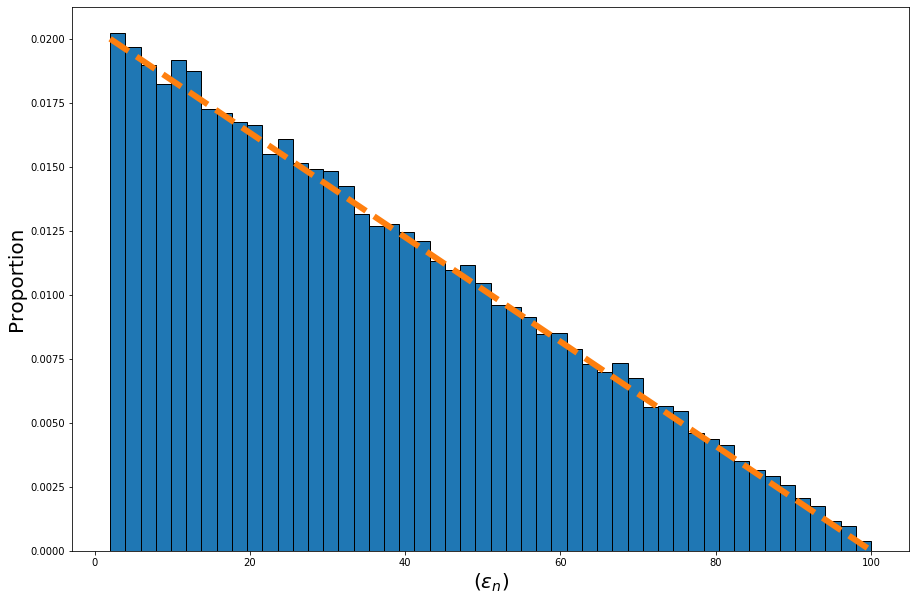

In [169]:
# On construit l'histogramme
_, _, _ = plt.hist(matrix, edgecolor='black',
                   bins=n-2, density=True)

plt.plot([2,2*(n-2)],[1/(n-2),0],linestyle="--",linewidth=6)
plt.xlabel(r"$ \left( \varepsilon_{n}  \right)$",fontsize=20)
plt.ylabel('Proportion',fontsize=20)

plt.show()